# Penguin Classification

The objective of this decision tree is to classify penguins into their own species using the island where they live, sex and other attributes.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.tree import plot_tree

## Import and explore data

In [2]:
df = pd.read_csv('../data/penguins_size.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

## Clean data

In [6]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [9]:
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [10]:
df = df[df['sex'] != '.']
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


### Data cleaning conclusion:
The amount of rows removed (11) is acceptable.

## Plot exploration

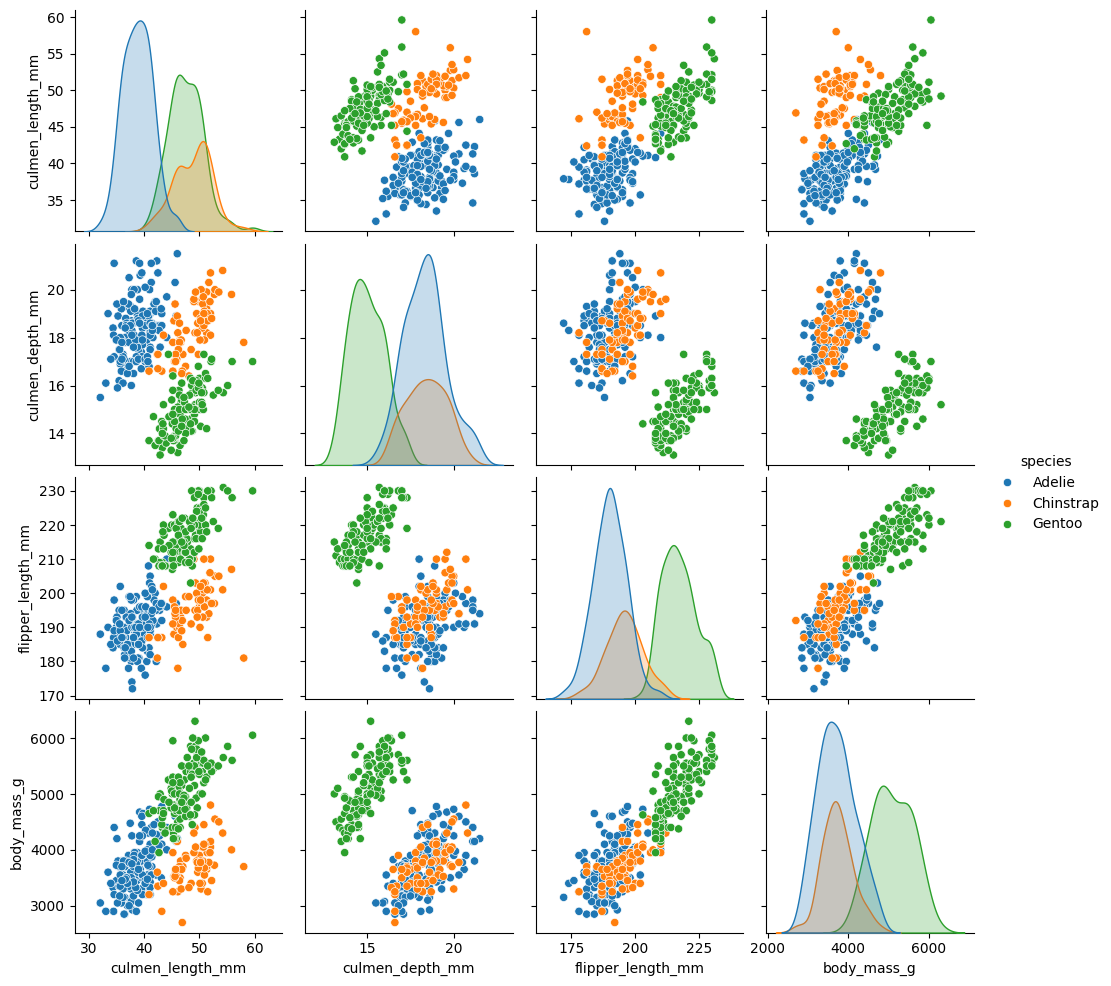

In [12]:
sns.pairplot(df, hue='species')

### Observation:
Culmen length looks like a promising feature

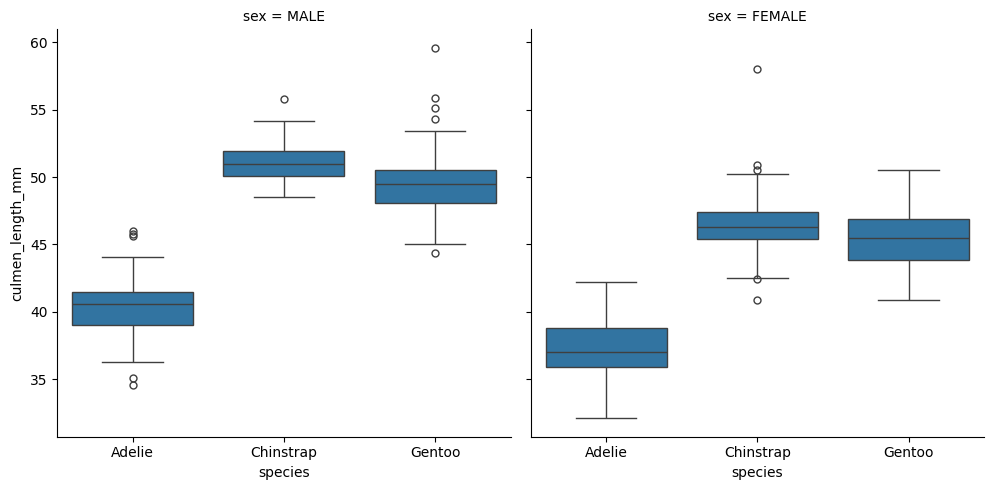

In [13]:
sns.catplot(x='species', y='culmen_length_mm', data=df, kind='box', col='sex')

## Data preparation for the algorithm

In [14]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model

In [15]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        48
   Chinstrap       1.00      0.94      0.97        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100



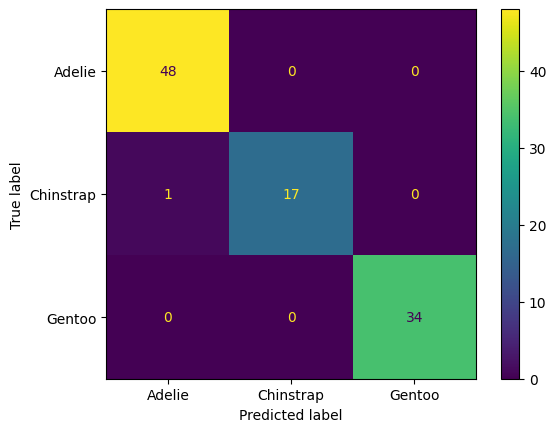

In [17]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, 
																		display_labels=model.classes_).plot()

In [18]:
pd.DataFrame(index=X.columns, data=model.feature_importances_,
						 columns=['Feature Importance']).sort_values('Feature Importance')

,Feature Importance
body_mass_g,0.000000
island_Torgersen,0.000000
sex_MALE,0.022851
island_Dream,0.037792
culmen_depth_mm,0.058057
culmen_length_mm,0.372000
flipper_length_mm,0.509300


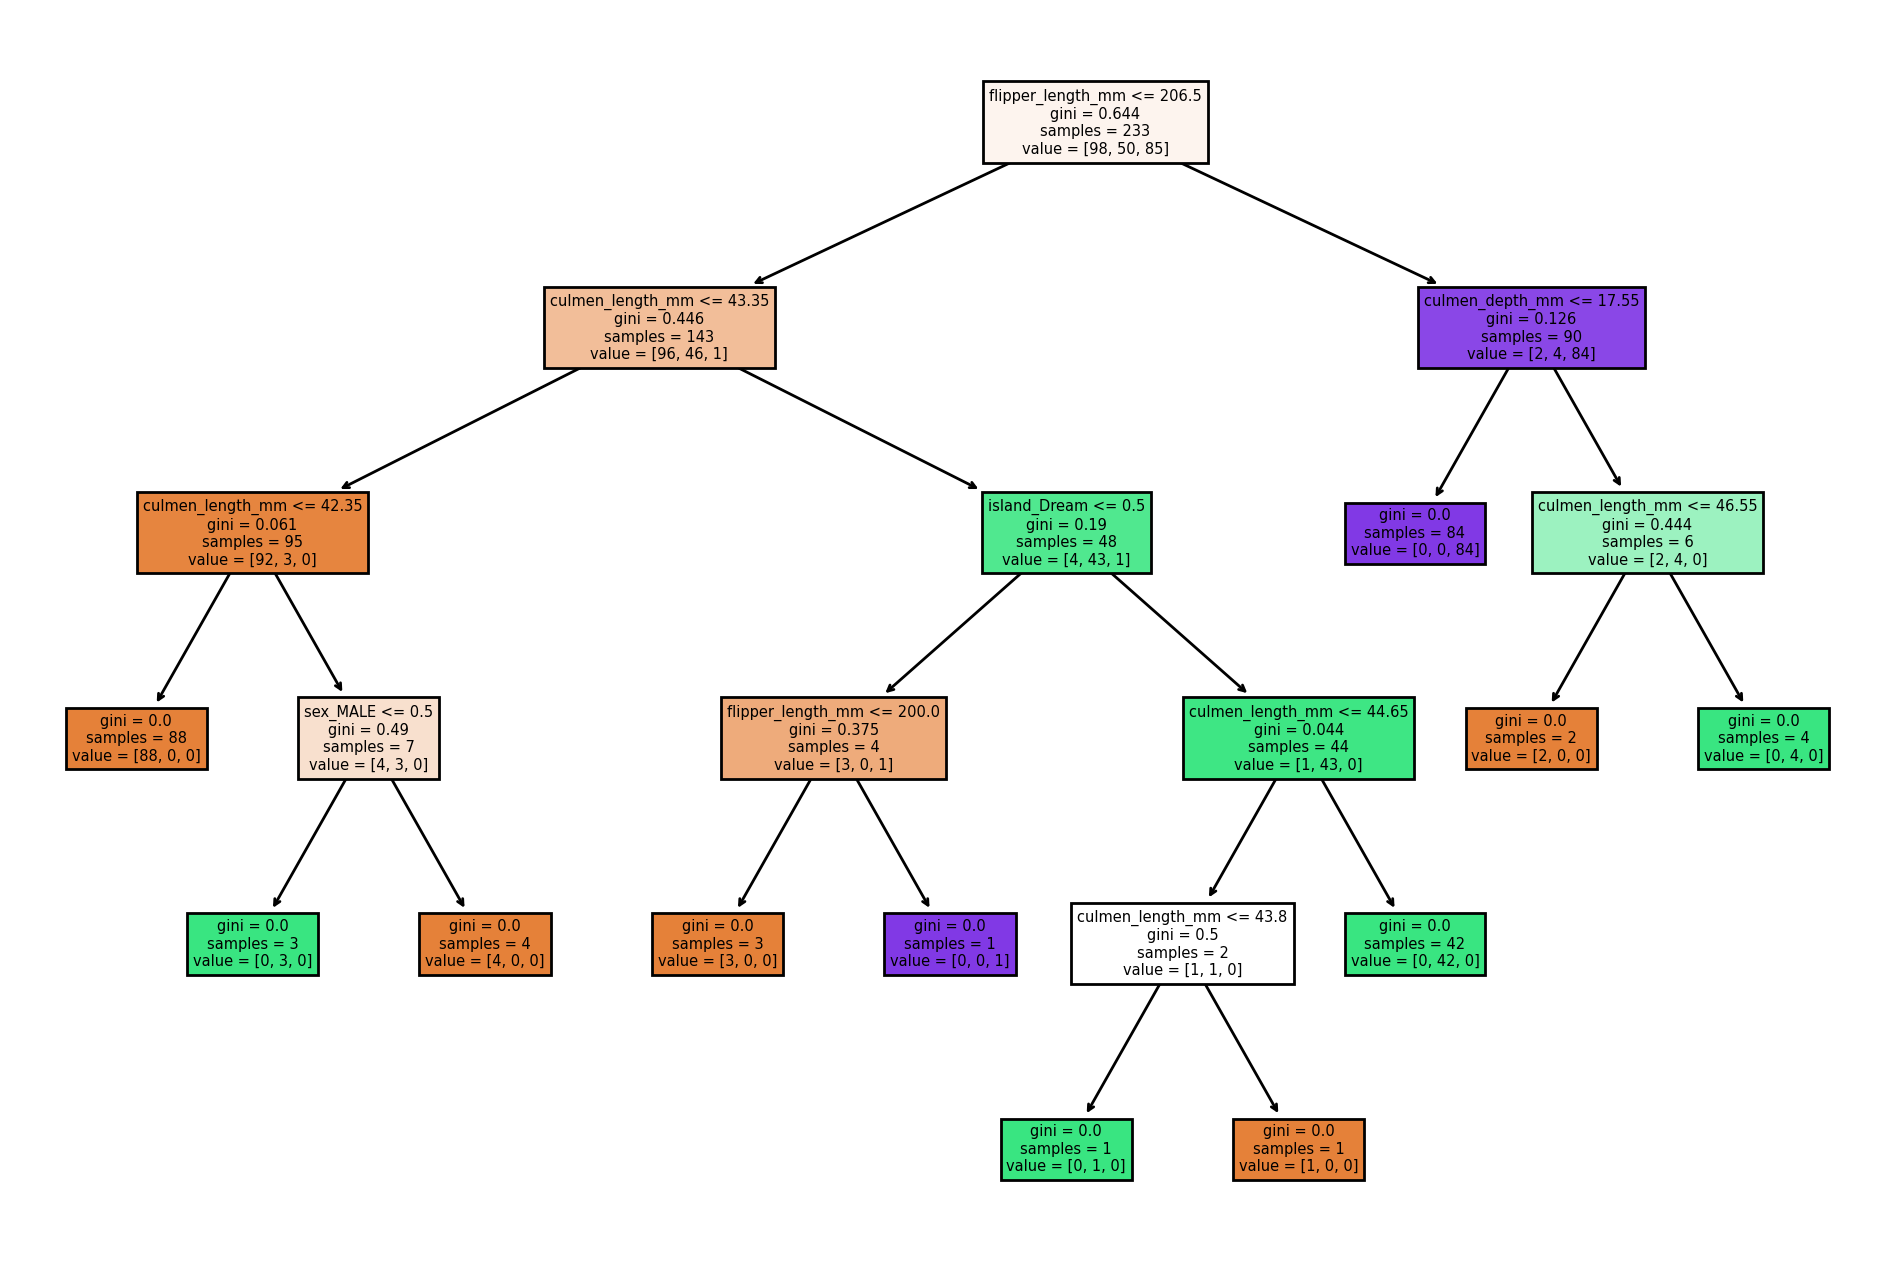

In [19]:
plt.figure(figsize=(12,8), dpi=200)
plot_tree(model, feature_names=X.columns, filled=True);

## Hyperparameter Tunning

In [20]:
def report_model(model):
	y_pred = model.predict(X_test)
	print(classification_report(y_test, y_pred))
	print('\n')
	cm = confusion_matrix(y_test, y_pred)
	cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, 
																		 display_labels=model.classes_).plot()
	print('\n')
	plt.figure(figsize=(12,8), dpi=200)
	plot_tree(model, feature_names=X.columns, filled=True);

              precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        48
   Chinstrap       1.00      0.89      0.94        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.98       100
   macro avg       0.99      0.96      0.97       100
weighted avg       0.98      0.98      0.98       100







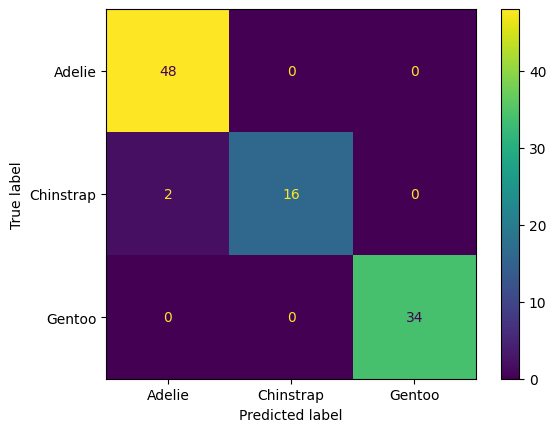

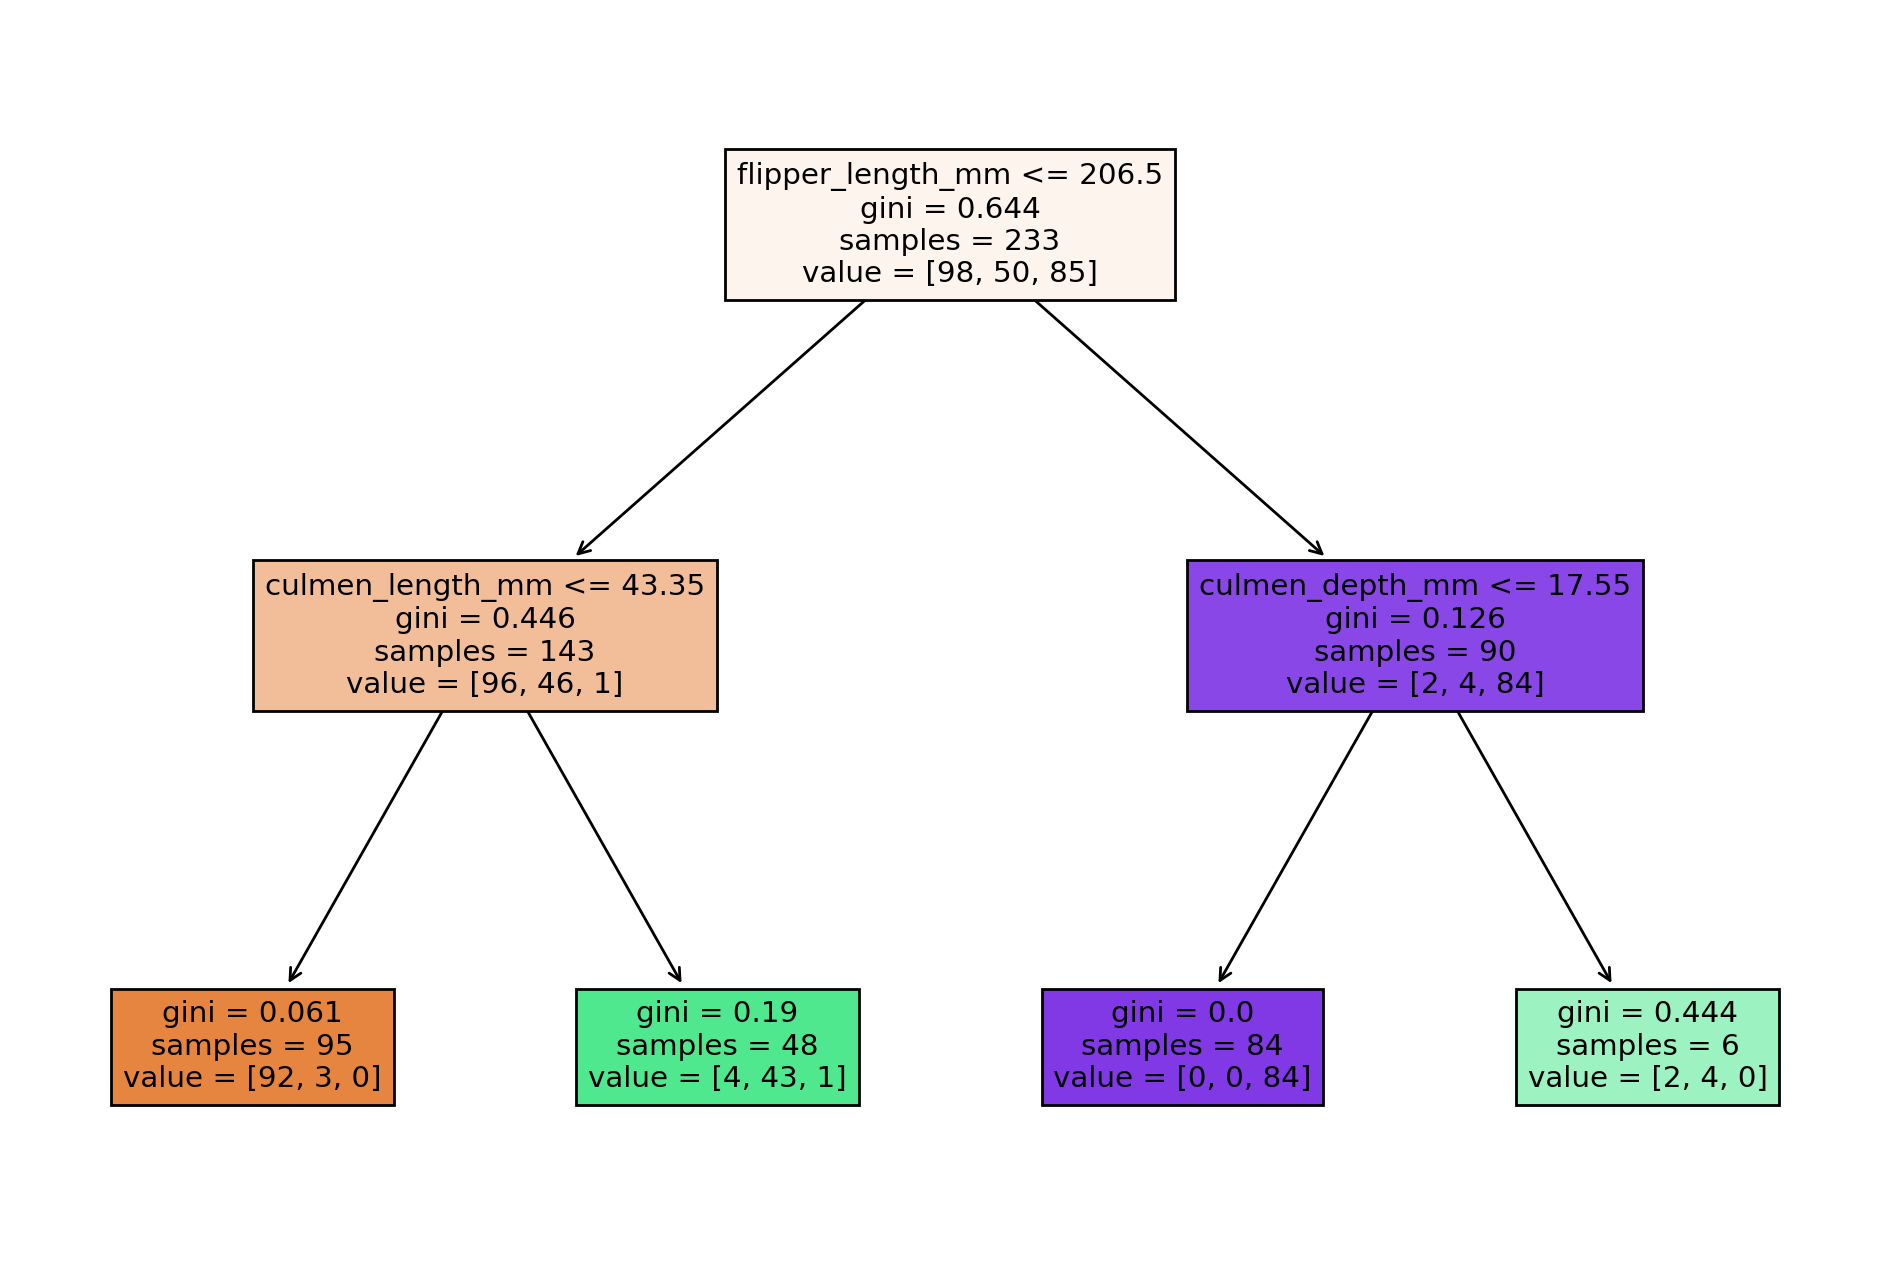

In [21]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train, y_train)
report_model(pruned_tree)

              precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        48
   Chinstrap       1.00      0.83      0.91        18
      Gentoo       0.97      1.00      0.99        34

    accuracy                           0.97       100
   macro avg       0.98      0.94      0.96       100
weighted avg       0.97      0.97      0.97       100







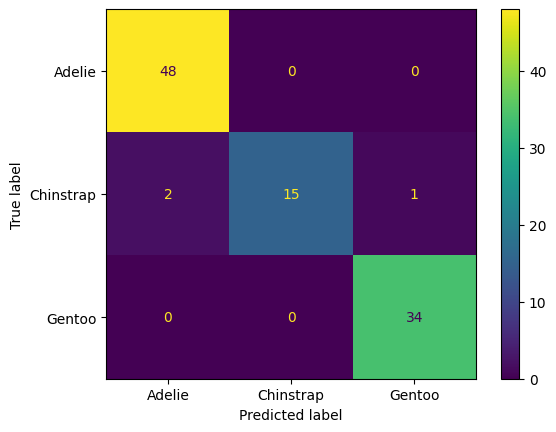

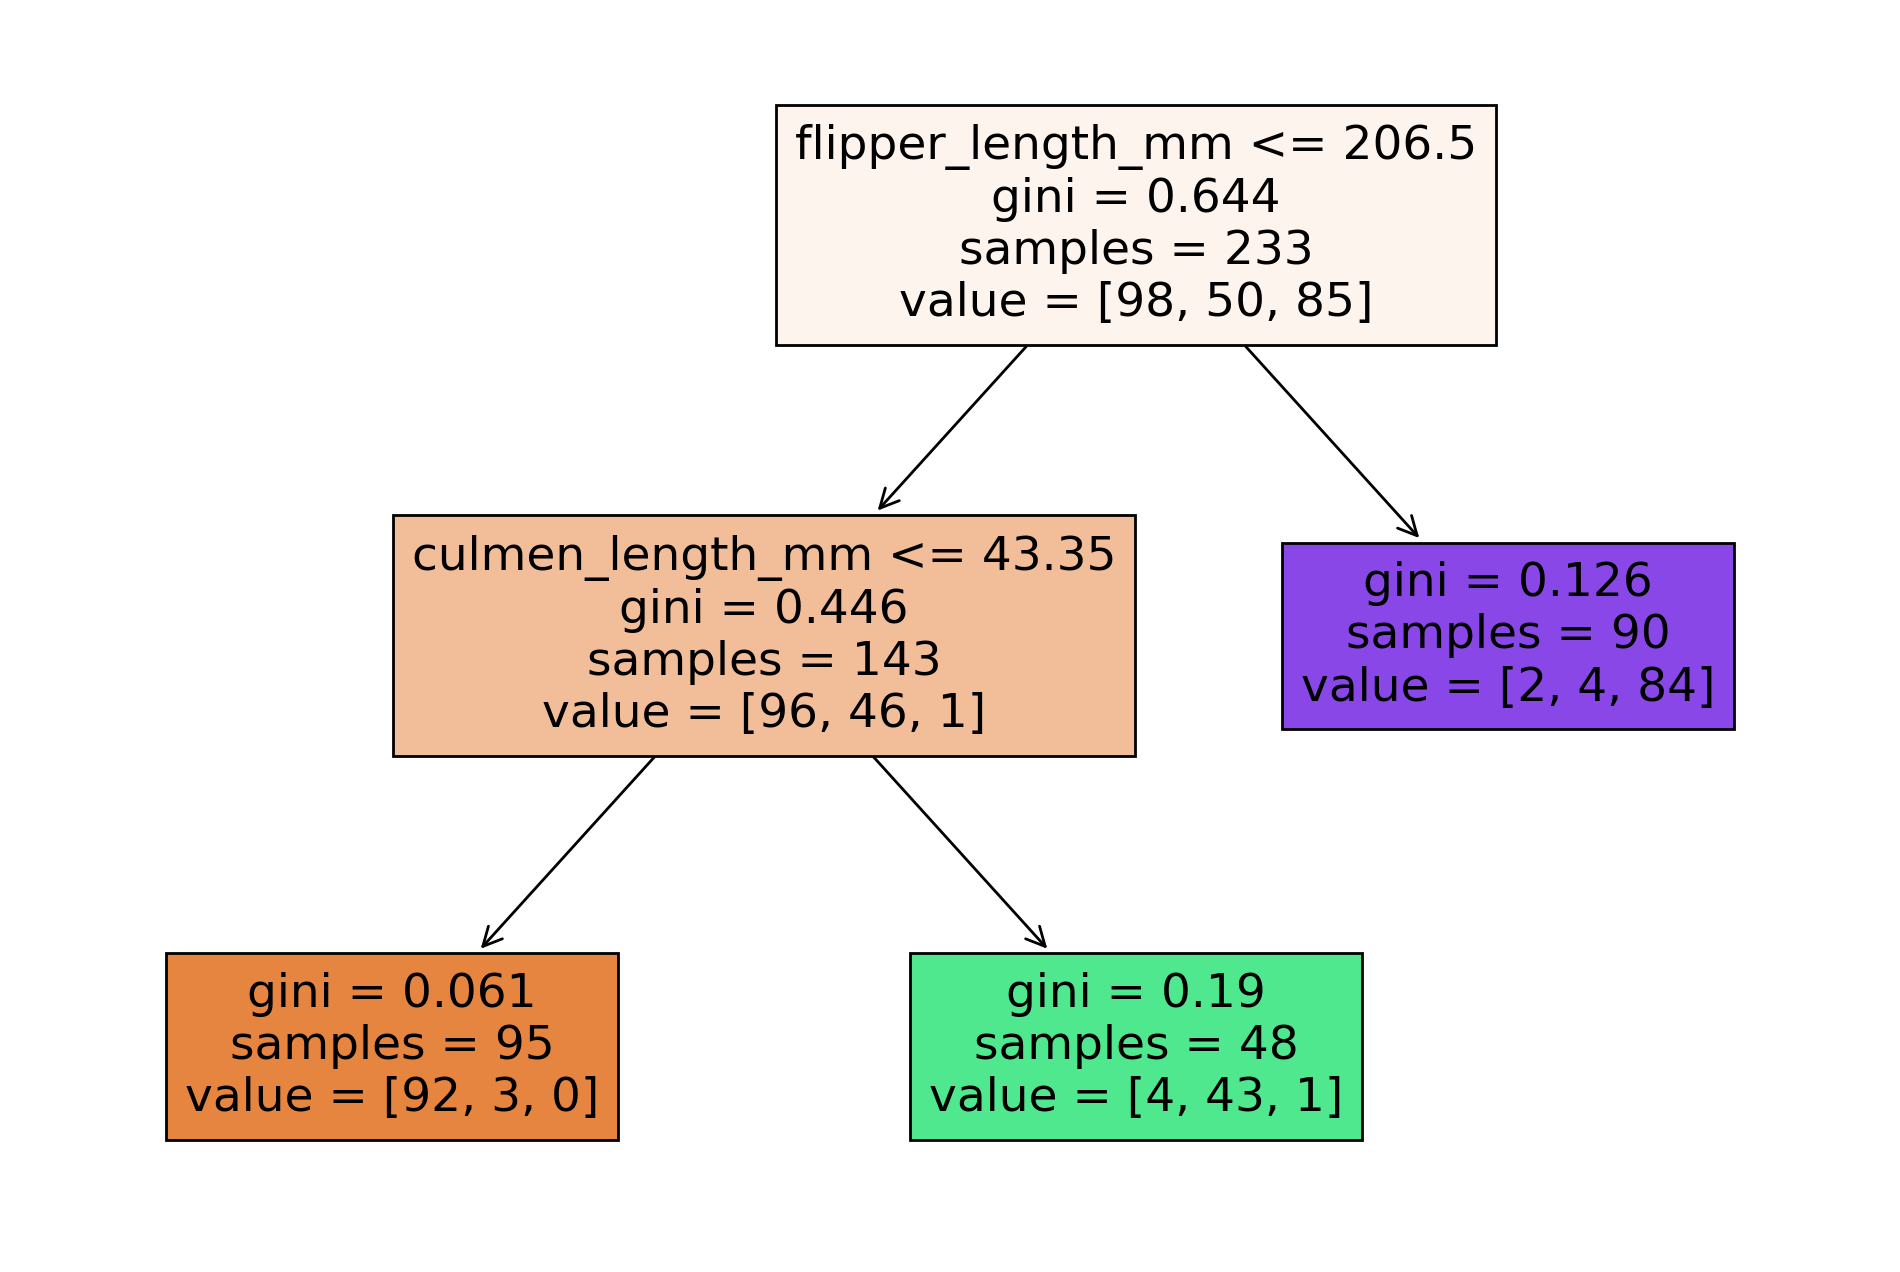

In [22]:
max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes=3)
max_leaf_tree.fit(X_train, y_train)
report_model(max_leaf_tree)

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        48
   Chinstrap       0.94      0.94      0.94        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.98       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.98      0.98      0.98       100







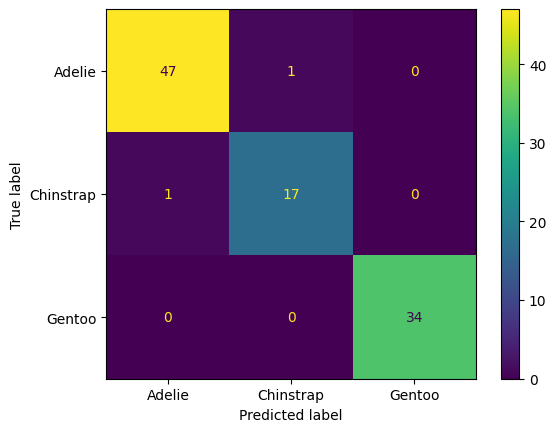

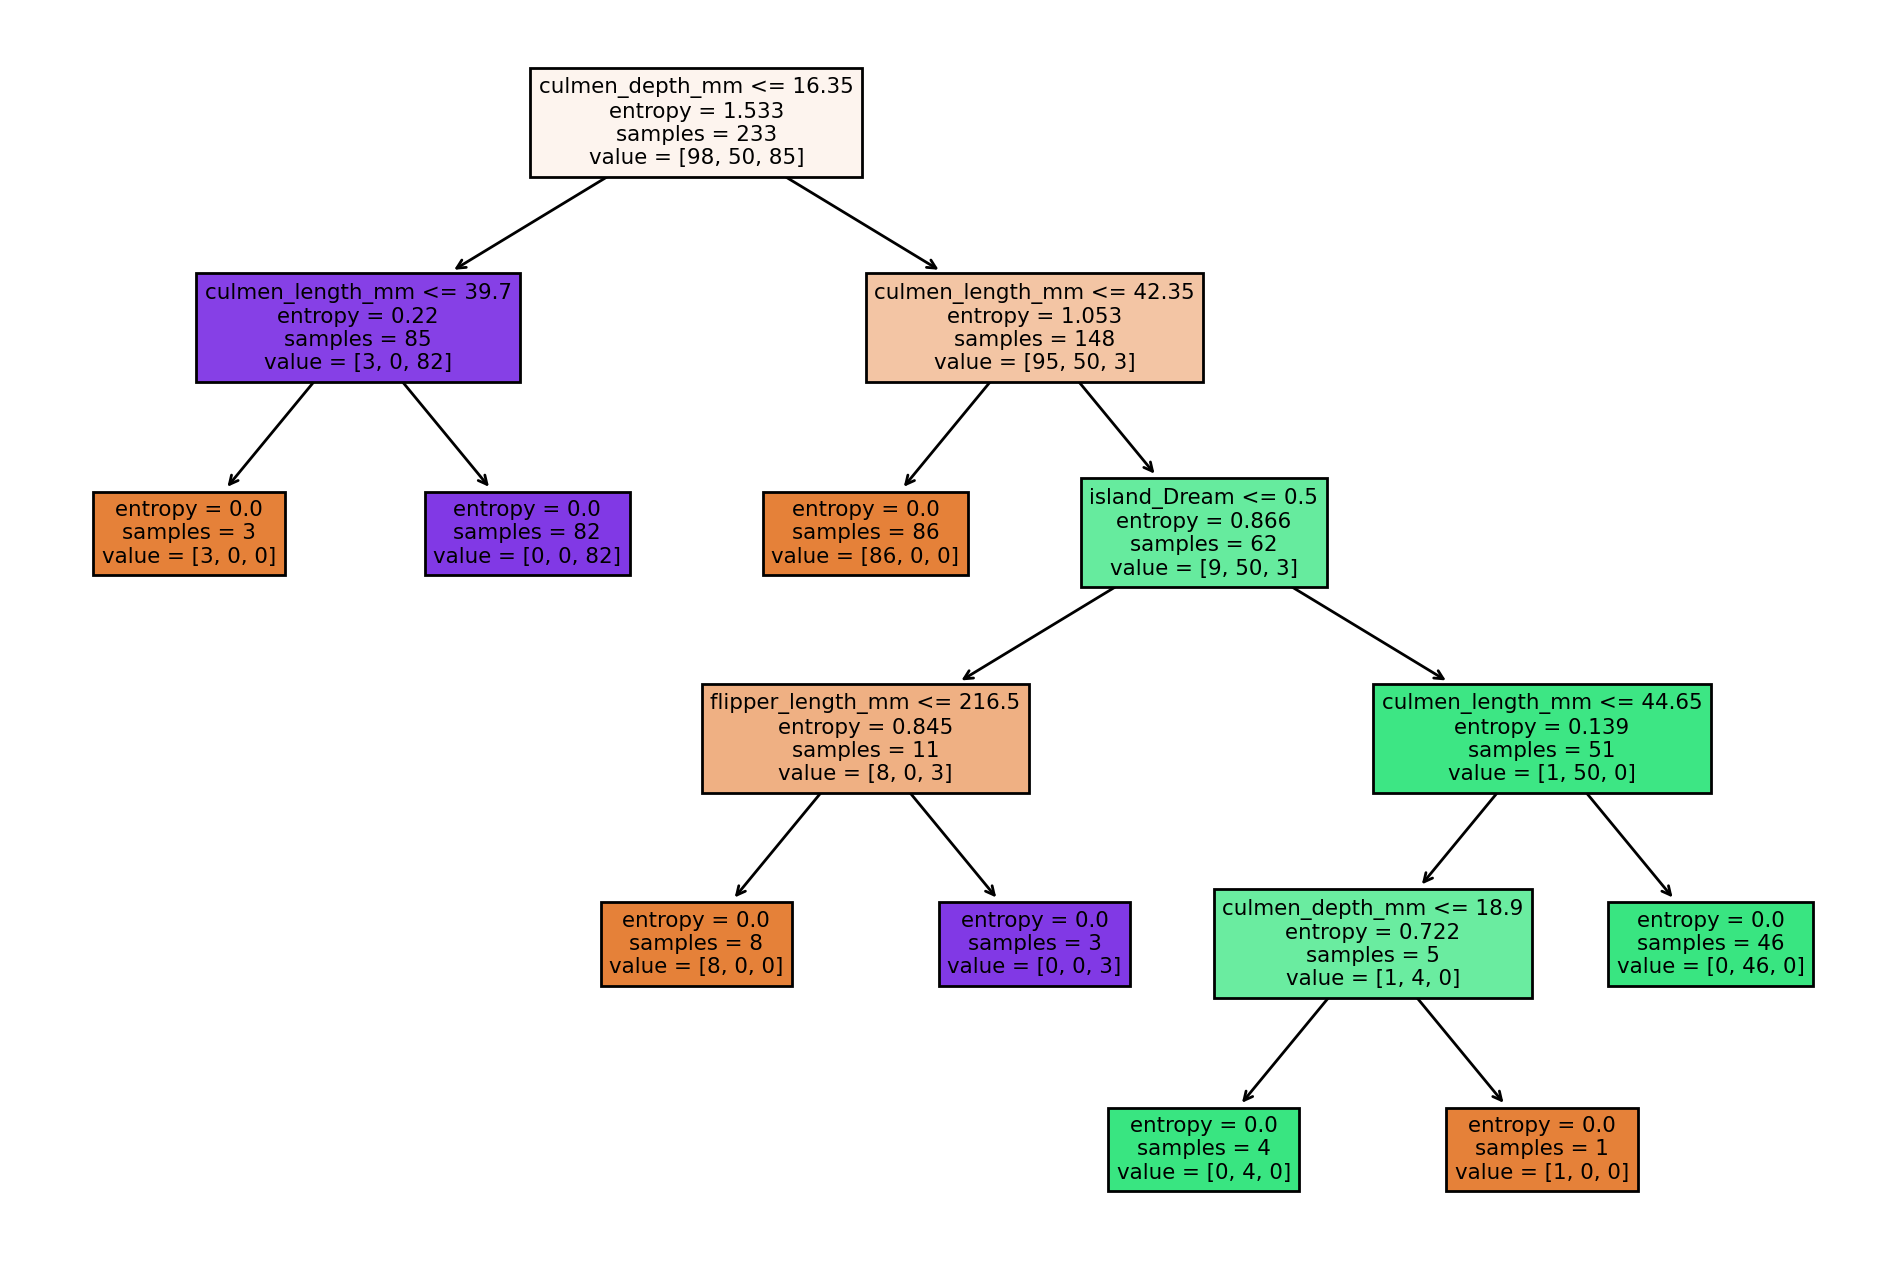

In [23]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train, y_train)
report_model(entropy_tree)